<h1><center>Bank Campaign</center></h1>


### Tentang File Ini: 

Ini adalah set data bank pemasaran klasik yang diunggah pada awalnya di Gudang Pembelajaran Mesin UCI. Dataset memberi Anda informasi tentang kampanye pemasaran lembaga keuangan tempat Anda harus menganalisis untuk menemukan cara mencari strategi masa depan untuk meningkatkan kampanye pemasaran masa depan untuk bank.

### Informasi Data:

Data ini terkait dengan kampanye pemasaran langsung dari sebuah lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses jika produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

Sumber data : https://www.kaggle.com/janiobachmann/bank-marketing-dataset

### Tujuan : 
Menganalisa dataset kampanye bank dan menggunakan salah satu teknik machine learning dengan akurasi yang terbaik untuk memprediksi hasil kampanye pemasaran serta mengetahui faktor-faktor yang memengaruhi keberhasilan kampanye.

## Mempersiapkan Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_bank = pd.read_csv('bank.csv')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Berdasarkan data di atas, data memiliki nilai numerik dan kategorial

In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df_bank['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [5]:
df_bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [6]:
df_bank['education'].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [7]:
df_bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
df_bank['housing'].unique()


array(['yes', 'no'], dtype=object)

In [9]:
df_bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
df_bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [11]:
df_bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [12]:
df_bank['poutcome'].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [13]:
df_bank['deposit'].unique()

array(['yes', 'no'], dtype=object)

### Deksripsi tentang variabel kolom :

####  Independent Variabel (Input)

- Age : Usia client
- Job : Terdiri dari beberapa tipe pekerjaan client ('admin'.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'.)
- Marital : Status pernikahan  ('married', 'single', 'divorce'.)
- Education : Pendidikan ('Secondary', 'Tertiary', 'Primary', 'Unknown'.)
- Default : Memiliki kredit secara default? ('yes' , 'no')
- Housing : Memiliki Pinjaman Perumahan? ('yes' , 'no')
- Loan : Memiliki Pinjaman Pribadi? ('yes', 'no')
- Balance : Saldo Pribadi
- Contact : Jenis komunikasi ('cellular', 'telephone','unknown')
- Day : Hari terakhir komunikasi
- Month  : Bulan terakhir komunikasi 
- Duration : durasi Terakhir komunikasi, dalam detik (numerik). Catatan penting: atribut ini sangat memengaruhi target keluaran (mis., Jika durasi = 0 maka deposit = 'tidak'). Namun, durasi tidak diketahui sebelum panggilan dilakukan. Juga, setelah panggilan berakhir, y diketahui dengan jelas. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.
- Campaign : jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini
- Pdays : jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya
- Previous : jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini
- Poutcome : hasil dari kampanye pemasaran sebelumnya('failure','nonexistent','success')

#### Dependent Variabel (Target)
- Deposit : sudahkah klien berlangganan deposito berjangka? ('yes', 'no')


## Exploratory Data Analysis (EDA)

### Shape DataSet

In [14]:
df_bank.shape

(11162, 17)

Dataset Bank Campaign memiliki 11162 baris dan 17 kolom.

### Missing Value

In [15]:
df_bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

Data Bank Campaign tidak memiliki nilai yang hilang ataupun kosong.

## Dependent Variabel (Target)
### Variabel "deposit" :

Variabel Deposit pada dataset bank campaign merupakan salah satu kategori dimana client sudah berlangganan deposito ataupun belum berlangganan.

Berikut jumlah data client pada kolom deposit :

In [16]:
df_bank['deposit'].count()

11162

Jumlah data kolom deposit : 11162

In [17]:
df_bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Text(0, 0.5, 'Jumlah Data Deposit')

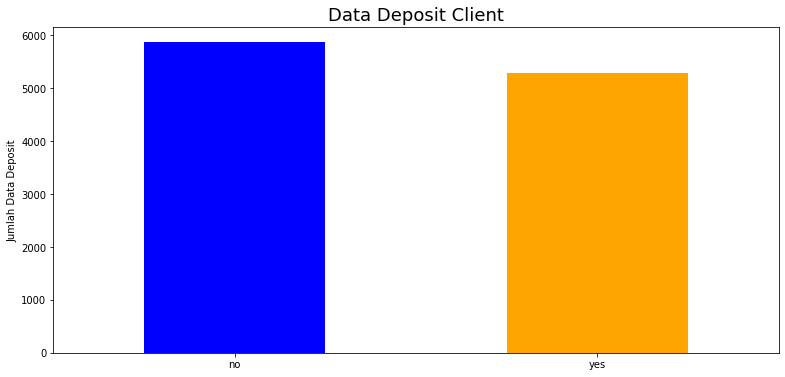

In [18]:
df_bank['deposit'].value_counts().plot(kind = 'bar' , 
                                       figsize = (13,6),
                                      color =['blue', 'orange'] )

plt.xticks(rotation=360)
plt.title('Data Deposit Client', fontsize = 18)

plt.ylabel('Jumlah Data Deposit')

Dari 11162 Client, 5289 sudah berlangganan deposito dan 5873 belum berlangganan.

### Persentase

In [19]:
df_bank['deposit'].value_counts(normalize=True)*100

no     52.616019
yes    47.383981
Name: deposit, dtype: float64

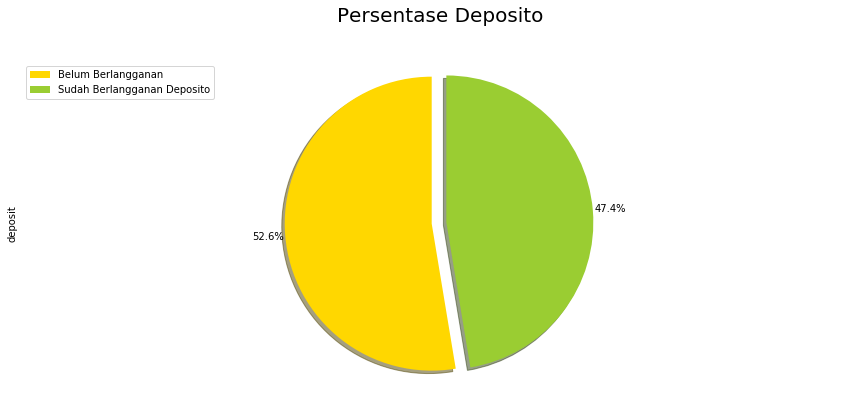

In [20]:
labels = ['Belum Berlangganan' , 'Sudah Berlangganan Deposito']
color_list = ['gold', 'yellowgreen']

explode_list =[0.1,0]

df_bank['deposit'].value_counts(normalize=True).plot(kind='pie',
                           figsize=(15,6),
                            startangle=90,
                           autopct='%1.1f%%',
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors= color_list,
                           explode= explode_list,
                           )

plt.title('Persentase Deposito', y=1.10, fontsize = 20)
plt.axis('Equal')

plt.legend(labels, loc='upper left')



plt.show()

Berdasarkan visualisasi persentase deposito client dalam dataset bank campaign :

- 52,6% client belum berlangganan deposito.
- 47,4% client Sudah berlangganan deposito.

## Independent Variabel 

### 1. Variabel "age" : 

In [21]:
df_bank['age'].describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

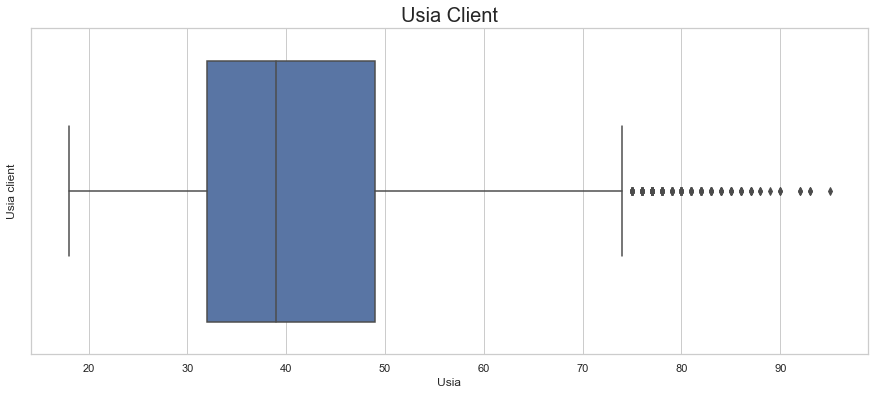

In [22]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
ax = sns.boxplot( x= 'age',data=df_bank)

    
plt.title( 'Usia Client', fontsize= '20')
plt.xlabel('Usia')
plt.ylabel('Usia client')


 
plt.show()

- Rata-rata usia client 41 tahun
- Usia termuda client 18 tahun
- Usia tertua client 95 tahun
- Median dari data usia client berada pada angka 39.

### Distribusi Jumlah Client Berdasarkan Usia

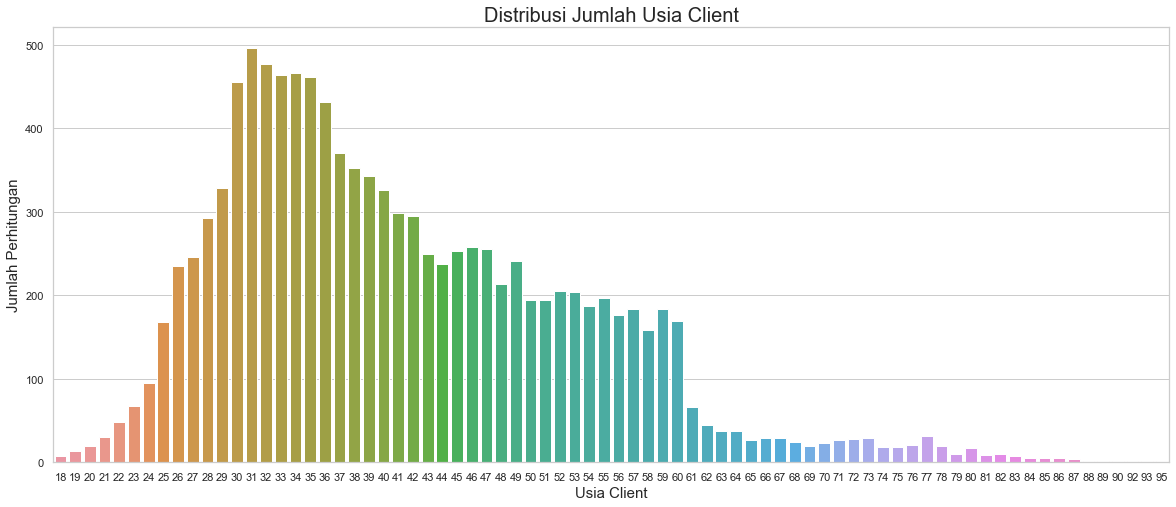

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df_bank)


plt.title('Distribusi Jumlah Usia Client', fontsize=20)
plt.xlabel('Usia Client', fontsize=15)
plt.ylabel('Jumlah Perhitungan', fontsize=15)

plt.show()


Dari visualisasi data di atas dapat diambil beberapa informasi :

- Client dengan usia 30 tahun menjadi client terbanyak dalam target bank campaign.
- Diikuti dengan client berumur 31 tahun di posisi kedua.
- Jumlah client paling sedikit ada pada rentang umur 88 - 95 tahun.

### Komparasi Usia Client Berdasarkan Pekerjaan

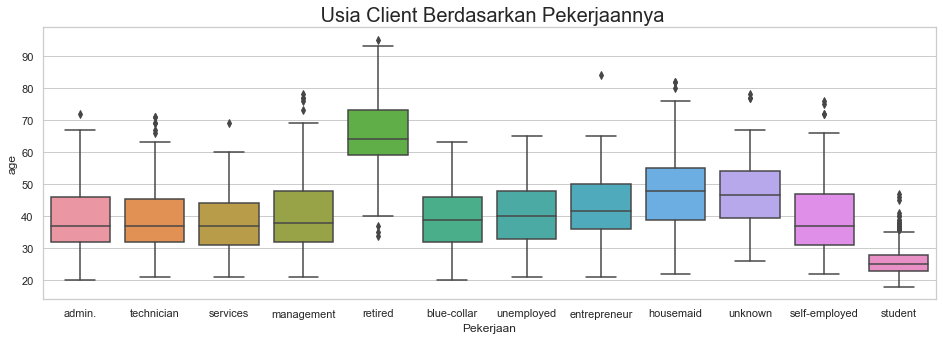

In [24]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,5))
ax = sns.boxplot(x="job", y = 'age',data=df_bank)

    
plt.title(' Usia Client Berdasarkan Pekerjaannya', fontsize= '20')
plt.xlabel('Pekerjaan')
plt.ylabel('age')


 
plt.show()


In [25]:
age_job = df_bank.groupby(['job'])['age'].describe()
print(age_job)

                count       mean        std   min   25%   50%   75%   max
job                                                                      
admin.         1334.0  39.374063   9.756770  20.0  32.0  37.0  46.0  72.0
blue-collar    1944.0  39.505144   9.178954  20.0  32.0  39.0  46.0  63.0
entrepreneur    328.0  42.887195   9.320135  21.0  36.0  41.5  50.0  84.0
housemaid       274.0  47.445255  11.063533  22.0  39.0  48.0  55.0  82.0
management     2566.0  40.218239   9.801734  21.0  32.0  38.0  48.0  78.0
retired         778.0  65.424165   9.801113  34.0  59.0  64.0  73.0  95.0
self-employed   405.0  39.809877  10.692641  22.0  31.0  37.0  47.0  76.0
services        923.0  38.141928   8.989896  21.0  31.0  37.0  44.0  69.0
student         360.0  26.102778   4.970441  18.0  23.0  25.0  28.0  47.0
technician     1823.0  39.001646   9.189163  21.0  32.0  37.0  45.5  71.0
unemployed      357.0  40.997199   9.789498  21.0  33.0  40.0  48.0  65.0
unknown          70.0  46.857143  11.9

Dari visualisasi data di atas dapat diambil beberapa informasi :
- client dengan usia dan rata-rata termuda memiliki profesi sebagai pelajar.
- client dengan usia dan rata-rata tertua sudah tidak bekerja / pensiunan.
- rata-rata umur client dengan profesi sebagai admin, blue-collar, self-employed, dan technician adalah 39 tahun.
- rata-rata umur client dengan profesi sebagai management dan client yang sedang tidak bekerja  adalah 42 tahun.
- rata-rata umur client dengan profesi sebagai entrepeneur adalah 40 tahun.
- rata-rata umur client dengan profesi sebagai housemaid adalah 47 tahun. 
- rata-rata umur client dengan profesi sebagai services adalah 38 tahun. 
- rata-rata umur client yang pekerjaannya tidak diketahui adalah 46 tahun. 


### Komparasi Umur Client Berdasarkan Status Pernikahan

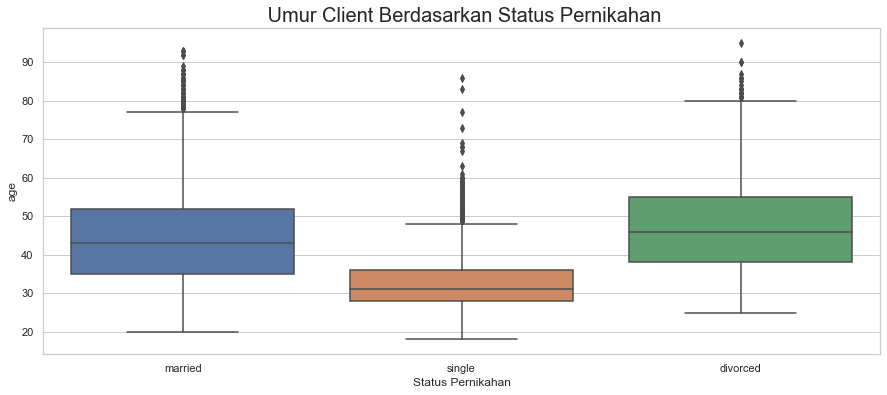

In [26]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
ax = sns.boxplot(x="marital", y = 'age',data=df_bank)

    
plt.title(' Umur Client Berdasarkan Status Pernikahan', fontsize= '20')
plt.xlabel('Status Pernikahan' , fontsize = 12)
plt.ylabel('age')


 
plt.show()

In [27]:
age_marital = df_bank.groupby(['marital'])['age'].describe()
print(age_marital)

           count       mean        std   min   25%   50%   75%   max
marital                                                             
divorced  1293.0  47.365043  11.732430  25.0  38.0  46.0  55.0  95.0
married   6351.0  44.533617  11.523646  20.0  35.0  43.0  52.0  93.0
single    3518.0  33.017339   7.685012  18.0  28.0  31.0  36.0  86.0


Dari visualisasi data di atas dapat diambil beberapa informasi :
- Client yang sudah menikah memiliki rata-rata usia 44 tahun.
- Client yang belum menikah memiliki rata-rata usia 33 tahun.
- Client yang bercerai memiliki rata-rata usia 47 tahun.

## Komparasi Umur Client Berdasarkan Pendidikan

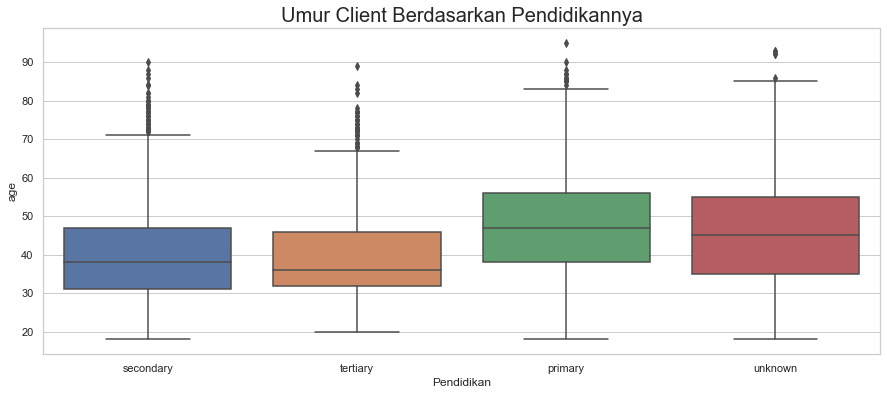

In [28]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
ax = sns.boxplot(x="education", y = 'age',data=df_bank)

    
plt.title(  'Umur Client Berdasarkan Pendidikannya', fontsize= '20')
plt.xlabel('Pendidikan')
plt.ylabel('age')


 
plt.show()


In [29]:
age_education = df_bank.groupby(['education'])['age'].describe()
print(age_education)

            count       mean        std   min   25%   50%   75%   max
education                                                            
primary    1500.0  48.220667  13.650160  18.0  38.0  47.0  56.0  95.0
secondary  5476.0  40.086012  11.202059  18.0  31.0  38.0  47.0  90.0
tertiary   3689.0  39.513147  10.567873  20.0  32.0  36.0  46.0  89.0
unknown     497.0  45.523139  14.573367  18.0  35.0  45.0  55.0  93.0


Dari visualisasi data di atas dapat diambil beberapa informasi :
- Rata-rata usia client yang memiliki jenjang pendidikan dasar berusia 48 tahun.
- Rata-rata usia client yang memiliki jenjang pendidikan menengah berusia 40 tahun.
- Rata-rata usia client yang memiliki jenjang pendidikan tersier berusia 39 tahun.


## 2. Variabel "Job"

### Distribusi Jumlah Pekerjaan Client

In [30]:
df_bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

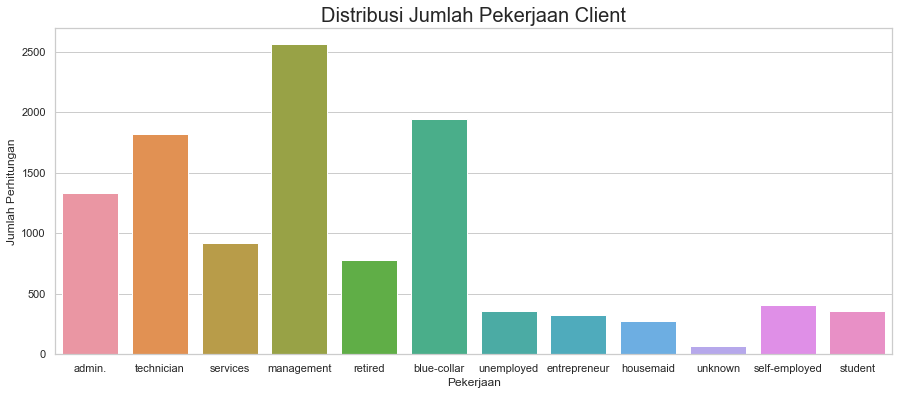

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.countplot(x = 'job', data = df_bank)


plt.title('Distribusi Jumlah Pekerjaan Client', fontsize=20)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Jumlah Perhitungan', fontsize=12)

plt.show()

Dari visualisasi data di atas dapat diambil beberapa informasi :

- Client dengan profesi management menjadi mayoritas dalam dataset bank campaign dengan jumlah 2566 orang.
- Diikuti dengan profesi blue-collar sebagai terbanyak kedua dengan jumlah 1944 orang.
- Client dengan profesi Housemaid menjadi profesi tersedikit dengan jumlah 274 orang.
- Client yang profesinya tidak diketahui mencapai 70 orang.


## Distribusi Pekerjaan Client Berdasarkan Pernikahan

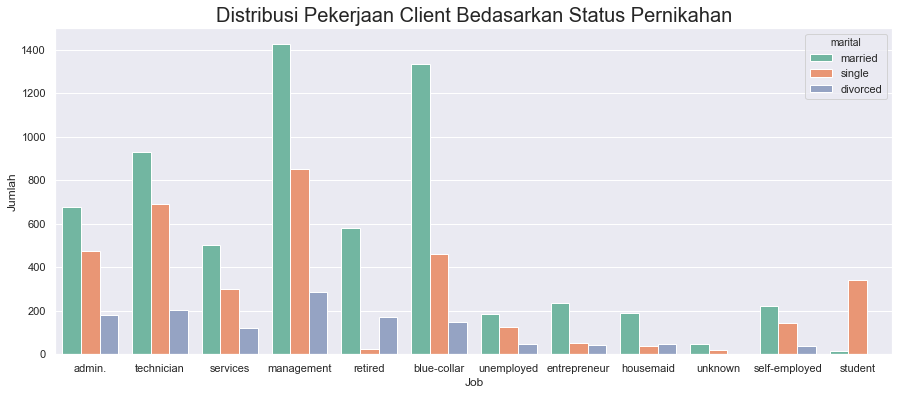

In [32]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(15,6))
sns.countplot(x = 'job', data = df_bank ,hue = 'marital', palette = "Set2")

plt.title('Distribusi Pekerjaan Client Bedasarkan Status Pernikahan', fontsize='20')
plt.xlabel('Job')
plt.ylabel('Jumlah')

plt.show()

In [33]:
job_marital = df_bank.groupby(['job'])['marital'].value_counts()
print(job_marital)

job            marital 
admin.         married      677
               single       475
               divorced     182
blue-collar    married     1335
               single       460
               divorced     149
entrepreneur   married      234
               single        52
               divorced      42
housemaid      married      190
               divorced      46
               single        38
management     married     1428
               single       850
               divorced     288
retired        married      581
               divorced     171
               single        26
self-employed  married      222
               single       144
               divorced      39
services       married      504
               single       298
               divorced     121
student        single       343
               married       15
               divorced       2
technician     married      930
               single       689
               divorced     204
unemployed     m

Dari visualisasi data di atas dapat diambil beberapa informasi :
- Mayoritas profesi client yang sudah menikah adalah management dan blue-collar.
- Client yang belum menikah mayoritas berprofesi sebagai management dan techinician.
- Client dengan profesi management juga memiliki jumlah tertinggi dalam status bercerai.

### Distribusi Pekerjaan Client Berdasarkan Pendidikan

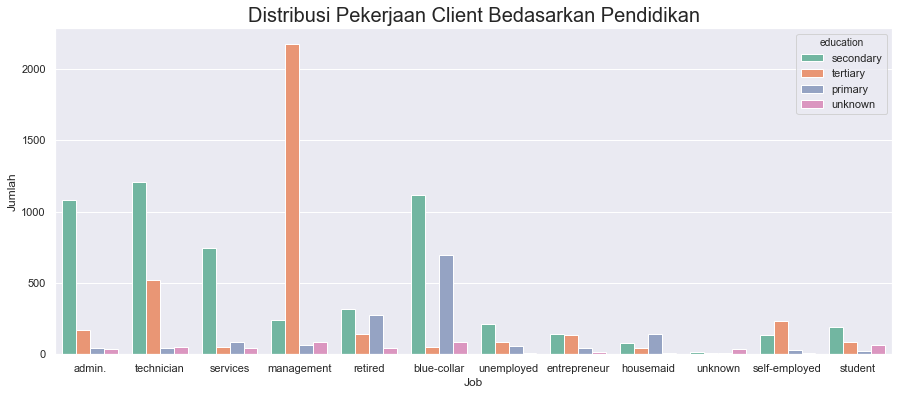

In [34]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(15,6))
sns.countplot(x = 'job', data = df_bank ,hue = 'education', palette = "Set2")

plt.title('Distribusi Pekerjaan Client Bedasarkan Pendidikan', fontsize='20')
plt.xlabel('Job')
plt.ylabel('Jumlah')

plt.show()

In [35]:
job_education = df_bank.groupby(['job'])['education'].value_counts()
print(job_education)

job            education
admin.         secondary    1084
               tertiary      168
               primary        42
               unknown        40
blue-collar    secondary    1116
               primary       694
               unknown        86
               tertiary       48
entrepreneur   secondary     141
               tertiary      132
               primary        41
               unknown        14
housemaid      primary       144
               secondary      78
               tertiary       43
               unknown         9
management     tertiary     2178
               secondary     238
               unknown        84
               primary        66
retired        secondary     314
               primary       277
               tertiary      140
               unknown        47
self-employed  tertiary      230
               secondary     136
               primary        28
               unknown        11
services       secondary     746
               pri

Dari visualisasi data di atas dapat diambil beberapa informasi :
- Jumlah client dengan profesi management yang memiliki pendidikan tersier terbanyak.
- Diikuti dengan profesi technician yang memiliki pendidikan secondary.
- Dan profesi blue-collar dengan pendidikan primary terbanyak.

## 3. Variabel "Marital"
### Distribusi Jumlah Marital Client

In [36]:
df_bank['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

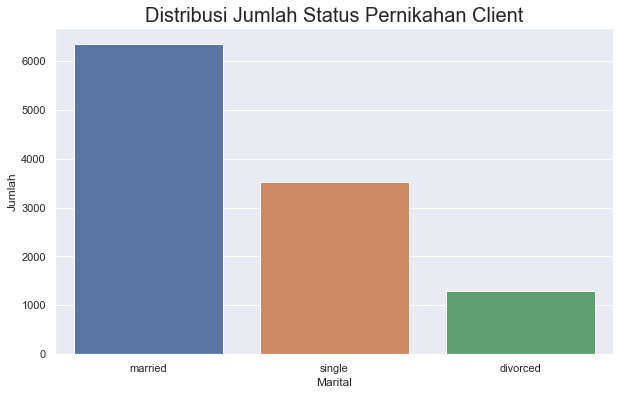

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'marital', data = df_bank)


plt.title('Distribusi Jumlah Status Pernikahan Client', fontsize=20)
plt.xlabel('Marital', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

Dari visualisasi data di atas dapat diambil beberapa informasi :
- Mayoritas Client sudah menikah dengan jumlah 6351 orang.
- Jumlah client yang belum menikah 3518 orang.
- Client yang bercerai 1293 orang.

### Distribusi Status Pernikahan Bedasarkan Pendidikan 

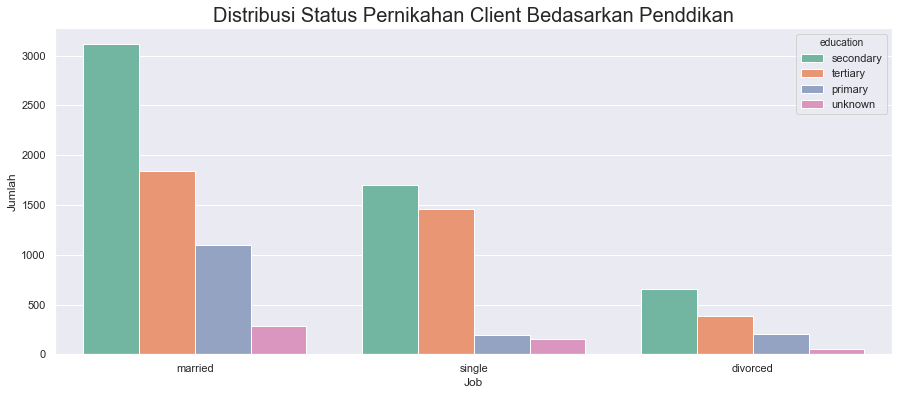

In [38]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(15,6))
sns.countplot(x = 'marital', data = df_bank ,hue = 'education', palette = "Set2")

plt.title('Distribusi Status Pernikahan Client Bedasarkan Penddikan', fontsize='20')
plt.xlabel('Job')
plt.ylabel('Jumlah')

plt.show()

In [39]:
marital_education = df_bank.groupby(['marital'])['education'].value_counts()
print(marital_education)

marital   education
divorced  secondary     652
          tertiary      386
          primary       204
          unknown        51
married   secondary    3120
          tertiary     1843
          primary      1099
          unknown       289
single    secondary    1704
          tertiary     1460
          primary       197
          unknown       157
Name: education, dtype: int64


Dari visualisasi data di atas dapat diambil beberapa informasi :
- Mayoritas Pendidikan client yang sudah menikah adalah pendidikan menengah sebanyak 3120 orang.
- Client yang memiliki pendidikan tersier dan belum menikah berjumlah 1460 orang dan yang sudah menikah berjumlah 1843 orang.
- Plot dengan jumlah terendah berada pada client dengan status bercerai.

## 4. Variabel "Default"

### Distribusi Jumlah Kredit Client Secara Default

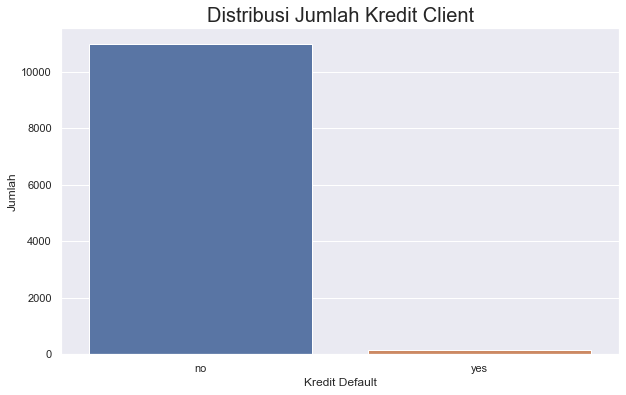

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'default', data = df_bank)


plt.title('Distribusi Jumlah Kredit Client', fontsize=20)
plt.xlabel('Kredit Default', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

In [41]:
df_bank['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

10994 Client tidak memiliki kredit secara default dan 168 lainnya memiliki.

### Persentase

In [42]:
df_bank['default'].value_counts(normalize=True)*100

no     98.494893
yes     1.505107
Name: default, dtype: float64

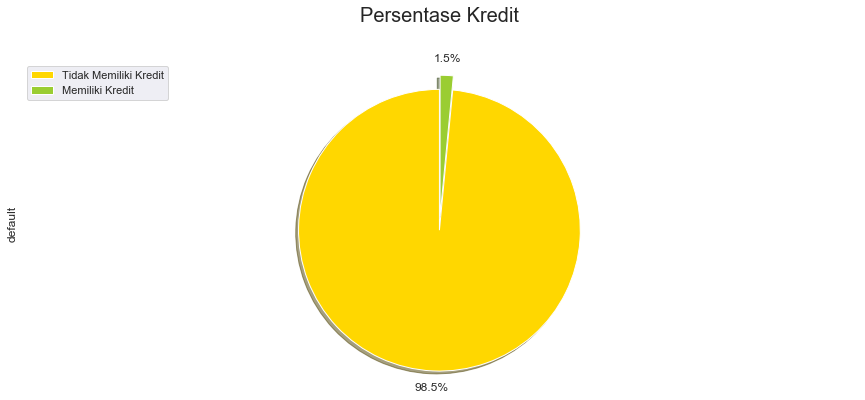

In [43]:
labels = ['Tidak Memiliki Kredit' , 'Memiliki Kredit']
color_list = ['gold', 'yellowgreen']

explode_list =[0.1,0]

df_bank['default'].value_counts(normalize=True).plot(kind='pie',
                           figsize=(15,6),
                            startangle=90,
                           autopct='%1.1f%%',
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors= color_list,
                           explode= explode_list,
                           )

plt.title('Persentase Kredit', y=1.10, fontsize = 20)
plt.axis('Equal')

plt.legend(labels, loc='upper left')



plt.show()

Persentasie jumlah kredit dari seluruh client :
- 98.5% Tidak Memiliki Kredit Secara Default
- 1.5% Memiliki Kredit

## 5. Variabel "balance"

## Saldo Client

In [44]:
df_bank['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

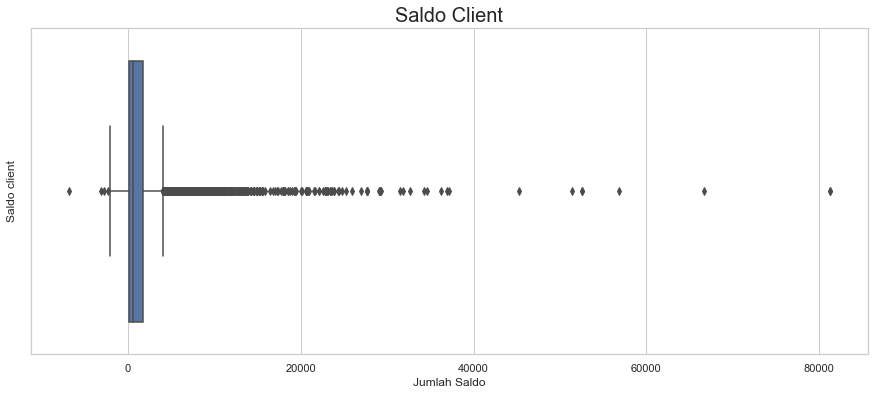

In [45]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
ax = sns.boxplot( x= 'balance',data=df_bank)

    
plt.title('Saldo Client', fontsize= '20')
plt.xlabel('Jumlah Saldo')
plt.ylabel('Saldo client')


 
plt.show()

- Rata-rata saldo yang dimiliki client 1528.
- Saldo terbesar salah satu client mencapai 81204.
- Saldo terkecil salah satu client mencapai -6847.

## 6. Variabel "housing"


## Distribusi Jumlah Pinjaman Perumahan

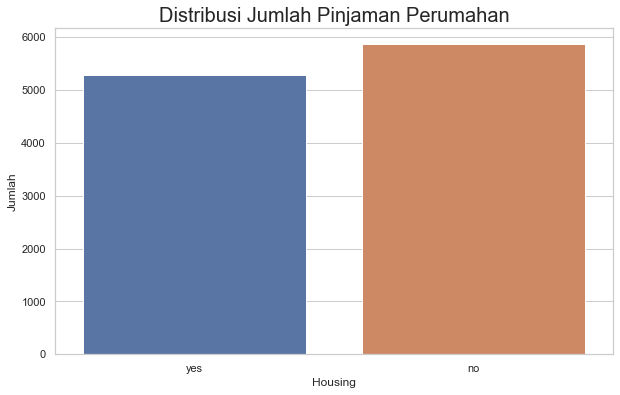

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'housing', data = df_bank)


plt.title('Distribusi Jumlah Pinjaman Perumahan', fontsize=20)
plt.xlabel('Housing', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

In [47]:
df_bank['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

- Client yang memiliki pinjaman untuk perumahan berjumlah 5281 orang
- Client yang tidak memiliki pinjaman berjumlah 5881

### Persentase

In [48]:
df_bank['housing'].value_counts(normalize=True)*100

no     52.68769
yes    47.31231
Name: housing, dtype: float64

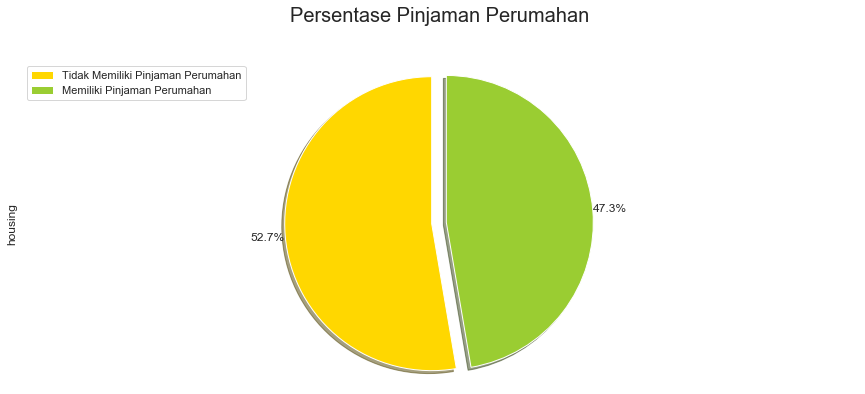

In [49]:
labels = ['Tidak Memiliki Pinjaman Perumahan' , 'Memiliki Pinjaman Perumahan']
color_list = ['gold', 'yellowgreen']

explode_list =[0.1,0]

df_bank['housing'].value_counts(normalize=True).plot(kind='pie',
                           figsize=(15,6),
                            startangle=90,
                           autopct='%1.1f%%',
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors= color_list,
                           explode= explode_list,
                           )

plt.title('Persentase Pinjaman Perumahan', y=1.10, fontsize = 20)
plt.axis('Equal')

plt.legend(labels, loc='upper left')



plt.show()

Persentase pinjaman perumahan dari seluruh jumlah client :
- 52,7% Tidak Memiliki Pinjaman Perumahan
- 47,3% Memiliki Pinjaman Perumahan

## 7. Variabel "loan"

### Distribusi Jumlah Pinjaman Pribadi

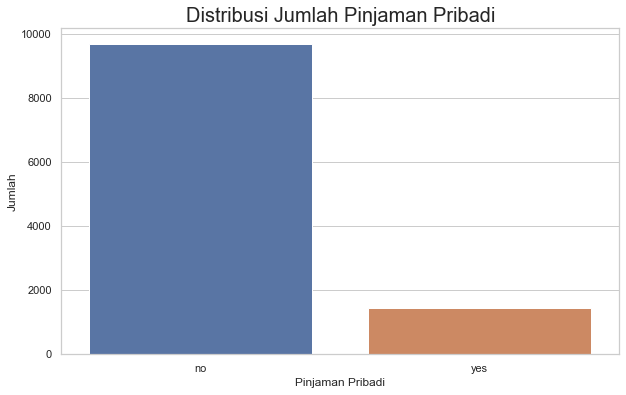

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'loan', data = df_bank)


plt.title('Distribusi Jumlah Pinjaman Pribadi', fontsize=20)
plt.xlabel('Pinjaman Pribadi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

In [51]:
df_bank['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

- Client yang tidak memiliki pinjaman pribadi sebanyak 9702 orang.
- Client yang memiliki pinjaman pribadi sebanyak 1460 orang.

### Persentase

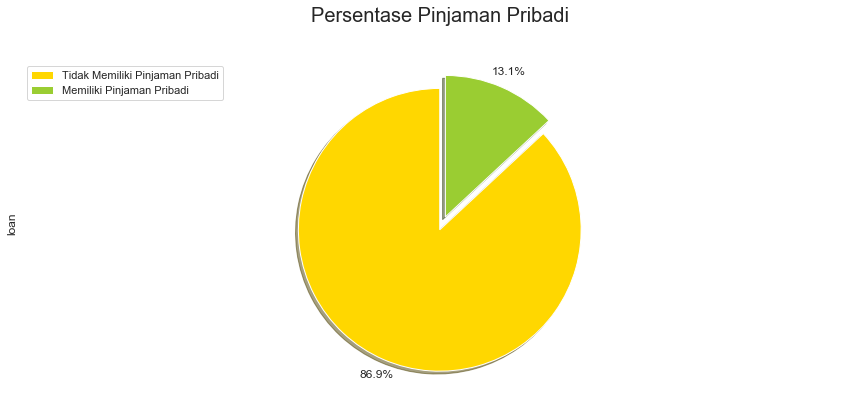

In [52]:
labels = ['Tidak Memiliki Pinjaman Pribadi' , 'Memiliki Pinjaman Pribadi']
color_list = ['gold', 'yellowgreen']

explode_list =[0.1,0]

df_bank['loan'].value_counts(normalize=True).plot(kind='pie',
                           figsize=(15,6),
                            startangle=90,
                           autopct='%1.1f%%',
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors= color_list,
                           explode= explode_list,
                           )

plt.title('Persentase Pinjaman Pribadi', y=1.10, fontsize = 20)
plt.axis('Equal')

plt.legend(labels, loc='upper left')



plt.show()

Persentase pinjaman pribadi dari seluruh jumlah client :
- 87% Tidak Memiliki Pinjaman Pribadi.
- 13% Memiliki Pinjaman Pribadi.

## 8. Variabel "contact"

### Distribusi Jumlah Jenis Komunikasi Dengan Client

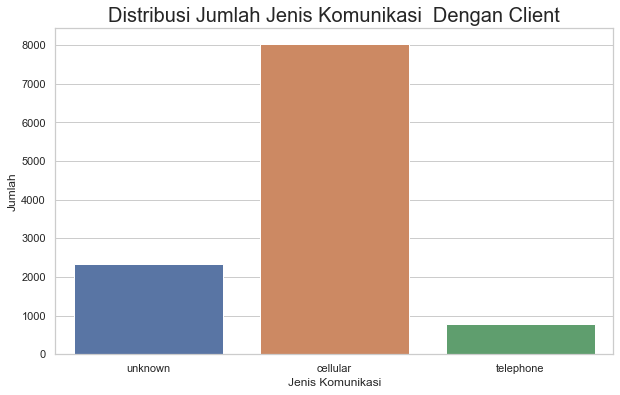

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'contact', data = df_bank)


plt.title('Distribusi Jumlah Jenis Komunikasi  Dengan Client', fontsize=20)
plt.xlabel('Jenis Komunikasi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

In [54]:
df_bank['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

- Mayoritas client bank campign dihubungi via celluar sebanyak 8042.
- Jenis Komunikasi yang tidak diketahui mencapai 2346.
- Client yang dihubungi via telephone sebanyak 774.

### Persentase

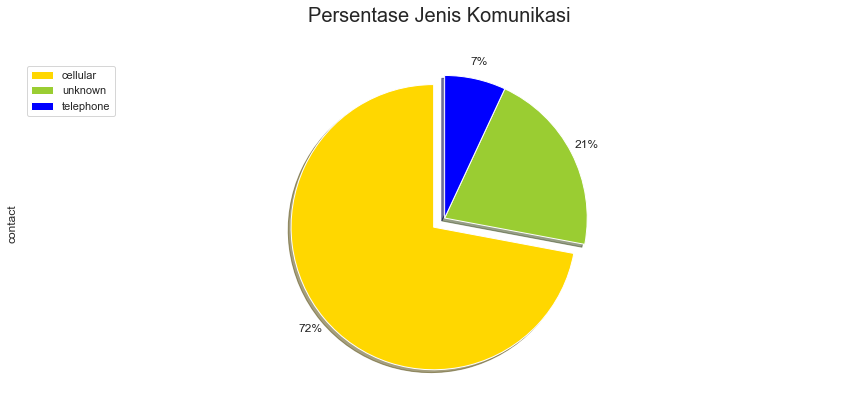

In [55]:
labels = ['cellular' , 'unknown', 'telephone']
color_list = ['gold', 'yellowgreen', 'blue']

explode_list =[0.1,0,0]

df_bank['contact'].value_counts(normalize=True).plot(kind='pie',
                           figsize=(15,6),
                            startangle=90,
                           autopct='%1.f%%',
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors= color_list,
                           explode= explode_list,
                           )

plt.title('Persentase Jenis Komunikasi', y=1.10, fontsize = 20)
plt.axis('Equal')

plt.legend(labels, loc='upper left')



plt.show()

Persentase jenis komunikasi yang dilakukan dengan client :
- 72% via cellular
- 21% tidak diketahui
- 7% via telephone

## 9. Variabel "day" 

## Distribusi Tanggal Komunikasi Dengan Client

In [56]:
df_bank['day'].value_counts()

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

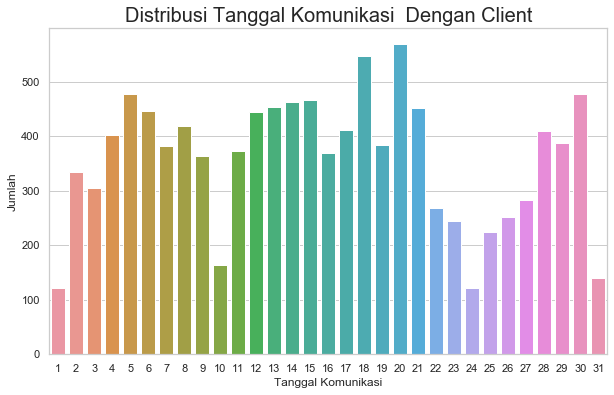

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'day', data = df_bank)


plt.title('Distribusi Tanggal Komunikasi  Dengan Client', fontsize=20)
plt.xlabel('Tanggal Komunikasi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

- Tanggal 18 dan 20 merupakan tanggal yang paling sering terjadi komunikasi dengan client.
- Tanggal 1 dan 24 merupakan tanggal yang paling jarang terjadi komunikasi dengan client

## 10. Variabel "month"
### Distribusi Bulan Komunikasi Dengan Client

In [58]:
df_bank['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

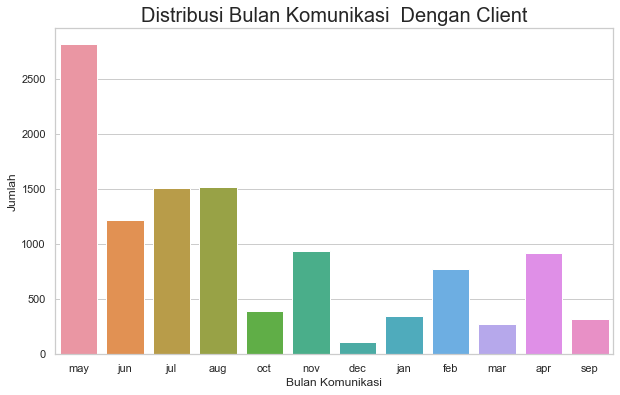

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'month', data = df_bank)


plt.title('Distribusi Bulan Komunikasi  Dengan Client', fontsize=20)
plt.xlabel('Bulan Komunikasi', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

- Bulan may menjadi bulan yang paling sering terjadi komunikasi dengan client.
- Bulan desc menjadi bulan yang paling jarang terjadi komunikasi dengan client.

## 11. Variabel "Duration"
### Durasi Panggilan Dengan Client

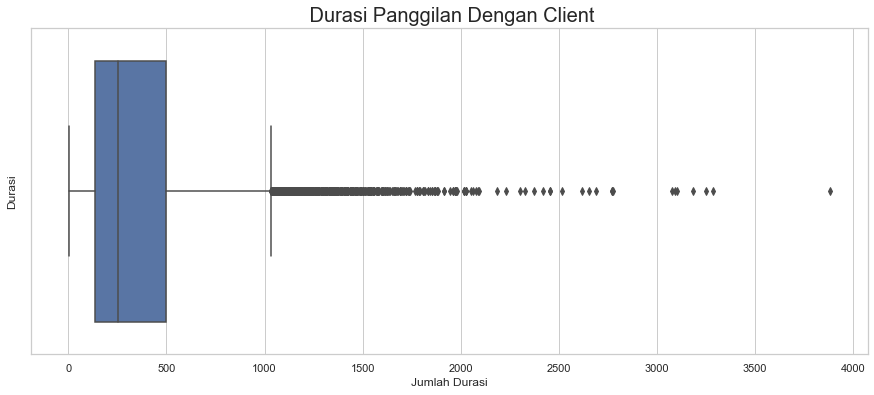

In [60]:
sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
ax = sns.boxplot( x= 'duration',data=df_bank)

    
plt.title(' Durasi Panggilan Dengan Client', fontsize= '20')
plt.xlabel('Jumlah Durasi')
plt.ylabel('Durasi')


 
plt.show()

In [61]:
df_bank['duration'].describe()

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

Untuk durasi panggilan dengan client, saya mengasumsikan data tersebut sebagai detik :

In [62]:
print("Maksimal durasi panggilan dengan client dalam menit:  ", round((df_bank['duration'].max()/60),1) ,"menit")
print("Minimal durasi panggilan dengan client dalam menit:   ", round((df_bank['duration'].min()/60),1), "menit")
print("Rata-rata durasi panggilan client dalam menit:   ", round((df_bank['duration'].mean()/60),1), "menit")

Maksimal durasi panggilan dengan client dalam menit:   64.7 menit
Minimal durasi panggilan dengan client dalam menit:    0.0 menit
Rata-rata durasi panggilan client dalam menit:    6.2 menit


## 12. Variabel "Campaign"
### Distribusi Jumlah Panggilan Pada Client

In [63]:
df_bank['campaign'].value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
24       5
19       5
20       5
30       4
22       4
26       3
23       3
25       3
43       2
29       2
32       2
63       1
33       1
41       1
31       1
28       1
27       1
Name: campaign, dtype: int64

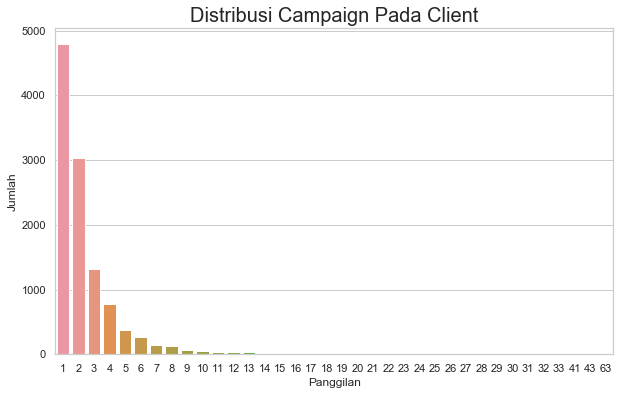

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'campaign', data = df_bank)


plt.title('Distribusi Campaign Pada Client', fontsize=20)
plt.xlabel('Panggilan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

- Panggilan yang paling sering dilakukan selama kampanye adalah 1x terhadap client mencapai 4798.

## 13. Variabel "poutcome"
### Distribusi Hasil Pemasaran Kampanye Sebelumnya

In [65]:
df_bank['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

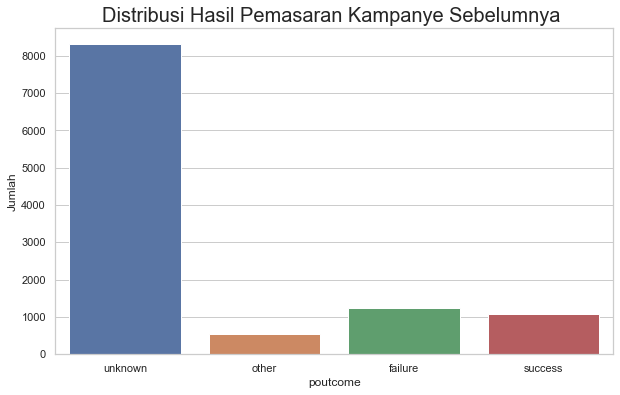

In [66]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.countplot(x = 'poutcome', data = df_bank)


plt.title('Distribusi Hasil Pemasaran Kampanye Sebelumnya ', fontsize=20)
plt.xlabel('poutcome', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()

Berdasarkan plot di atas jumlah hasil kampanye yang tidak diketahui hasilnya menjadi mayoritas dalam variabel poutcome.

## Hubungan Antara Independent variabel dengan dependent variabel
### 1. Variabel "age" dan deposit"

Dikarenakan usia client berbeda-beda dan memiliki rentang usia dari 18-95 tahun maka dari itu saya akan mengkategorikan usia client menjadi 4 kategori menggunakan fungsi .cut() dalam panda: 

In [67]:
bins = [18,32,46,60,95]
labels=[1,2,3,4]
df_bank['ctg_age'] = pd.cut(df_bank['age'], bins=bins, labels=labels, include_lowest=True)

In [68]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,ctg_age
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,3
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,3
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,3
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,3


- Kategori 1 = Rentang usia 18 tahun - 32 tahun
- Kategori 2 = Rentang usia 33 tahun - 46 tahun
- kategori 3 = Rentang usia 47 tahun - 60 tahun
- Kategori 4 = Rentang Usia 61 tahun - 95 tahun

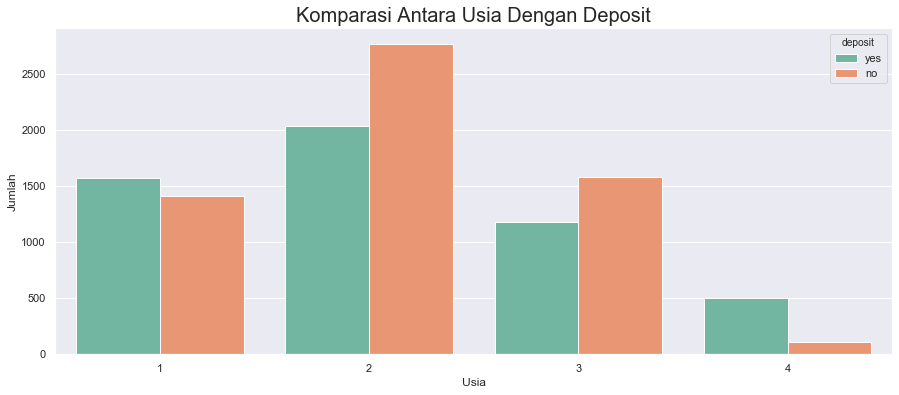

In [69]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(15,6))
sns.countplot(x = 'ctg_age', data = df_bank ,hue = 'deposit', palette = "Set2")

plt.title('Komparasi Antara Usia Dengan Deposit', fontsize='20')
plt.xlabel('Usia')
plt.ylabel('Jumlah')

plt.show()

Berdasarkan Plot di atas dapat diambil beberapa informasi : 

- Client yang paling banyak berlangganan deposito berjangka maupun tidak berlangganan ada pada kategori 2 usia client.
- Client yang paling sedikit berlangganan deposito berjangka dan tidak berlangganan berada pada kategori 4 usia client.

## 2. Variabel "job dan deposit"

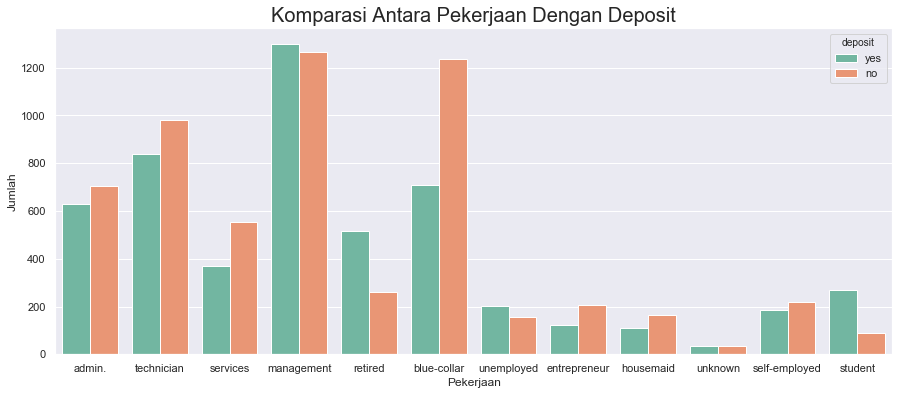

In [70]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(15,6))
sns.countplot(x = 'job', data = df_bank ,hue = 'deposit', palette = "Set2")

plt.title('Komparasi Antara Pekerjaan Dengan Deposit', fontsize='20')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah')

plt.show()

Berdasarkan Plot di atas dapat diambil beberapa informasi : 
- Client dengan profesi management adalah client terbanyak dalam berlangganan deposito berjangka maupun tidak.
- Client yang profesinya tidak diketahui menjadi client paling sedikit dalam berlanggnanan deposito berjangka maupun tidak

## 3. Variabel "education" dan "deposit"

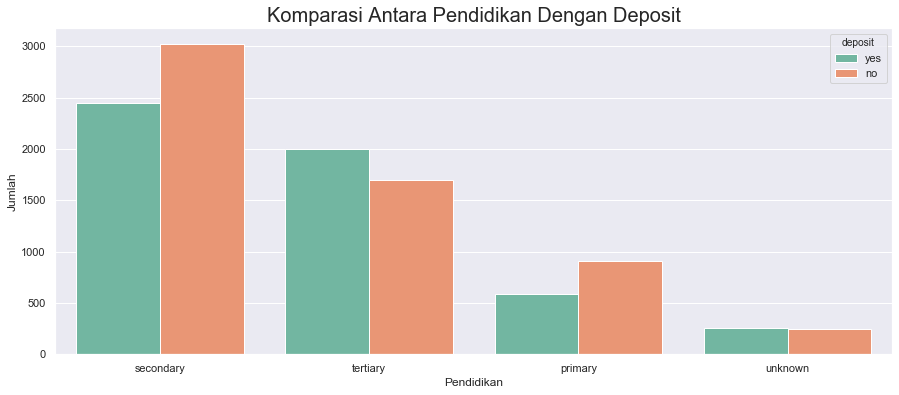

In [71]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(15,6))
sns.countplot(x = 'education', data = df_bank ,hue = 'deposit', palette = "Set2")

plt.title('Komparasi Antara Pendidikan Dengan Deposit', fontsize='20')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah')

plt.show()

Berdasarkan Plot di atas dapat diambil beberapa informasi : 
- Client dengan pendidikan menengah adalah client terbanyak dalam berlangganan deposit berjangka maupun tidak.
- Client dengan pendidikan yang tidak diketahui adalah client paling sedikit dalam berlangganan deposito berjangka maupun tidak

## 4. Variabel "contact" dan "deposit"

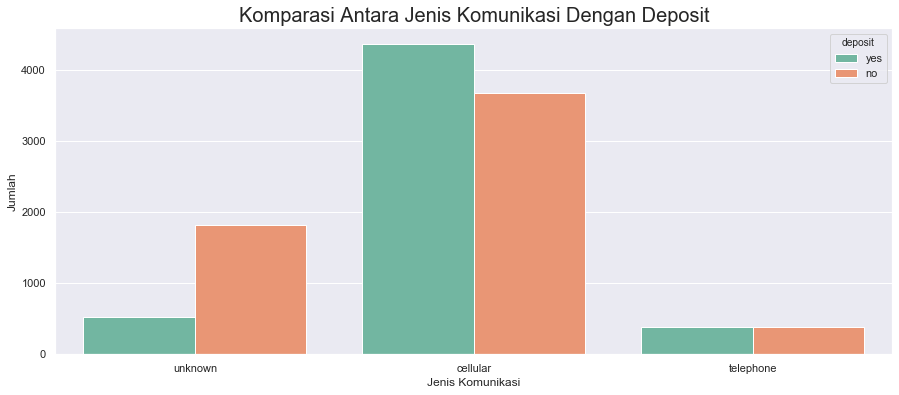

In [72]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(15,6))
sns.countplot(x = 'contact', data = df_bank ,hue = 'deposit', palette = "Set2")

plt.title('Komparasi Antara Jenis Komunikasi Dengan Deposit', fontsize='20')
plt.xlabel('Jenis Komunikasi')
plt.ylabel('Jumlah')

plt.show()

Berdasarkan Plot di atas dapat diambil beberapa informasi : 
- Client yang dihubungi melalui cellular menjadi client terbanyak dalam berlanggnan deposit berjangka maupun tidak.
- Client yang dihubungi melalui telephone menjadi client paling sedikit dalam berlanggnan deposit berjangka ataupun tidak

## 5. Variabel "duration" dan "deposit"

Sama seperti variabel age, disini saya akan mengkategorikan nilai dalam variabel durasi :

In [73]:
bins = [2,138,255,496,3881]
labels=[1,2,3,4]
df_bank['ctg_duration'] = pd.cut(df_bank['duration'], bins=bins, labels=labels, include_lowest=True)

In [74]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,ctg_age,ctg_duration
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,3,4
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,3,4
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2,4
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,3,4
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,3,4


- Kategori 1 = Rentang durasi 2 detik - 138 detik
- Kategori 2 = Rentang durasi 139 detik - 255 detik
- Kategori 3 = Rentang durasi 256 detik - 496 detik
- Kategori 4 = Rentang durasi 497 detik - 3881 detik

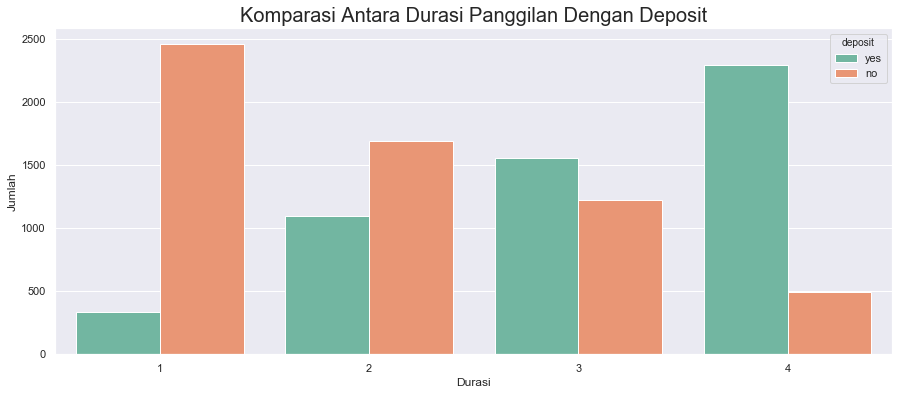

In [75]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(15,6))
sns.countplot(x = 'ctg_duration', data = df_bank ,hue = 'deposit', palette = "Set2")

plt.title('Komparasi Antara Durasi Panggilan Dengan Deposit', fontsize='20')
plt.xlabel('Durasi')
plt.ylabel('Jumlah')

plt.show()

Berdasarkan Plot di atas dapat diambil beberapa informasi : 
- Durasi panggilan client pada kategori 4 menjadi client terbanyak yang berlangganan deposito berjangka.
- Durasi panggilan client pada kategori 4 menjadi client paling sedikit yang menolak berlangganan deposito berjangka.
- Durasi panggilan client pada kategori 1 menjadi client yang paling banyak menolak berlangganan deposito berjangka.


## Korelasi Matriks Antar Variabel

Untuk mengetahui korelasi antara independent variabel dan dependent variabel membutuhkan tipe data numerik:

In [76]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_bank['deposit'] = labelencoder_X.fit_transform(df_bank['deposit']) 
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,ctg_age,ctg_duration
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,3,4
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,3,4
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,2,4
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,3,4
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,3,4


In [77]:
df_bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,ctg_age,ctg_duration
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0,2,3
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0,2,1
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0,1,2
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0,2,1
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,0,2,4


Sekarang dependent variabel sudah menjadi tipe data numerik dengan kategori 1 = Yes dan 0 = No.

In [78]:
corr = df_bank.corr()
corr.style.background_gradient(cmap='PuBu')

,age,balance,day,duration,campaign,pdays,previous,deposit
age,1,0.1123,-0.000762421,0.000189228,-0.00527794,0.00277383,0.0201686,0.0349009
balance,0.1123,1,0.0104674,0.0224361,-0.0138938,0.0174111,0.0308052,0.0811286
day,-0.000762421,0.0104674,1,-0.0185114,0.137007,-0.0772316,-0.0589807,-0.0563258
duration,0.000189228,0.0224361,-0.0185114,1,-0.0415575,-0.0273916,-0.0267162,0.451919
campaign,-0.00527794,-0.0138938,0.137007,-0.0415575,1,-0.102726,-0.0496995,-0.128081
pdays,0.00277383,0.0174111,-0.0772316,-0.0273916,-0.102726,1,0.507272,0.151593
previous,0.0201686,0.0308052,-0.0589807,-0.0267162,-0.0496995,0.507272,1,0.139867
deposit,0.0349009,0.0811286,-0.0563258,0.451919,-0.128081,0.151593,0.139867,1


Berdasarkan tabel korelasi matriks lama durasi panggilan pada client memiliki korelasi yang cukup besar terhadap variabel deposit sebesar 0,45.

## Memprediksi Hasil Kampanye Pemasaran

### Mempersiapkan Format Independent Variabel

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
df_bank['job'] = labelencoder_X.fit_transform(df_bank['job'])
df_bank['marital'] = labelencoder_X.fit_transform(df_bank['marital'])
df_bank['education'] = labelencoder_X.fit_transform(df_bank['education'])
df_bank['default'] = labelencoder_X.fit_transform(df_bank['default'])
df_bank['housing'] = labelencoder_X.fit_transform(df_bank['housing'])
df_bank['loan'] = labelencoder_X.fit_transform(df_bank['loan'])
df_bank['contact'] = labelencoder_X.fit_transform(df_bank['contact'])
df_bank['month'] = labelencoder_X.fit_transform(df_bank['month'])
df_bank['poutcome'] = labelencoder_X.fit_transform(df_bank['poutcome']) 
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,ctg_age,ctg_duration
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,3,4
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,3,4
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,2,4
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,3,4
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,3,4


In [80]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,ctg_age,ctg_duration
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,3,4
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,3,4
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,2,4
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,3,4
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,3,4


## Membuat Model

In [81]:
X = df_bank[['age', 'job', 'marital', 'education','default',
             'balance', 'housing', 'loan', 'contact', 'day', 'month',
             'duration','campaign','pdays','previous', 'poutcome']]
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3


In [82]:
y = df_bank[['deposit']]
y.head()

,deposit
0,1
1,1
2,1
3,1
4,1


In [83]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_pred1=model.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test,y_pred1))
matrix=confusion_matrix(y_test,y_pred1)
print(matrix)

0.8016121809225257
[[990 191]
 [252 800]]


## Decision Tree

In [87]:
from sklearn import tree
dt=tree.DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
y_pred2=dt.predict(X_test)

In [89]:
print(accuracy_score(y_test,y_pred2))
matrix1=confusion_matrix(y_test,y_pred2)
print(matrix1)

0.780564263322884
[[942 239]
 [251 801]]


## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier


rf=RandomForestClassifier( n_estimators = 100)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
y_pred3=rf.predict(X_test)

In [92]:
print(accuracy_score(y_test,y_pred3))
matrix2=confusion_matrix(y_test,y_pred3)
print(matrix2)
print(rf.feature_importances_)

0.8580385132109271
[[977 204]
 [113 939]]
[0.08426746 0.0388038  0.01891593 0.02303233 0.00142329 0.08953094
 0.03201695 0.01159686 0.0389127  0.0730846  0.08416058 0.36547336
 0.03449459 0.04098879 0.0241019  0.03919592]


## Support Vector Machine (SVM)

In [93]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [94]:
y_pred4=svm_model.predict(X_test)

In [95]:
print(accuracy_score(y_test,y_pred4))
matrix3=confusion_matrix(y_test,y_pred4)
print(matrix3)

0.8298253470667264
[[969 212]
 [168 884]]


## Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred5=nb.predict(X_test)

print(accuracy_score(y_test,y_pred5))
matrix4=confusion_matrix(y_test,y_pred5)
print(matrix4)

0.7577250335871025
[[855 326]
 [215 837]]


## K-NEAREST NEIGHBOR(kNN) 

In [97]:
from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()
kNN.fit(X_train,y_train)

y_pred6=kNN.predict(X_test)

print(accuracy_score(y_test,y_pred6))
matrix5=confusion_matrix(y_test,y_pred6)
print(matrix5)

0.7917599641737573
[[982 199]
 [266 786]]


In [98]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))

Accuracy: 0.7917599641737573


### Mencari n terbaik untuk kNN

In [99]:
k_range = range(1, 40)


error = []


for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred6 = knn.predict(X_test)
    error.append(metrics.accuracy_score(y_test, y_pred6))

print(error)

[0.7572772055530677, 0.7330944917151814, 0.7859381997313032, 0.7626511419614868, 0.7917599641737573, 0.7751903269144649, 0.7975817286162113, 0.7823555754590238, 0.7948947604120018, 0.7832512315270936, 0.7944469323779668, 0.7908643081056874, 0.7980295566502463, 0.7881773399014779, 0.7962382445141066, 0.7890729959695477, 0.7957904164800716, 0.787281683833408, 0.7908643081056874, 0.786833855799373, 0.7953425884460367, 0.7881773399014779, 0.7922077922077922, 0.786833855799373, 0.7877295118674429, 0.7850425436632333, 0.786833855799373, 0.7845947156291984, 0.7877295118674429, 0.7899686520376176, 0.7922077922077922, 0.7854903716972682, 0.7908643081056874, 0.7913121361397224, 0.7926556202418271, 0.787281683833408, 0.793999104343932, 0.7899686520376176, 0.7917599641737573]


Text(0, 0.5, 'Error mean')

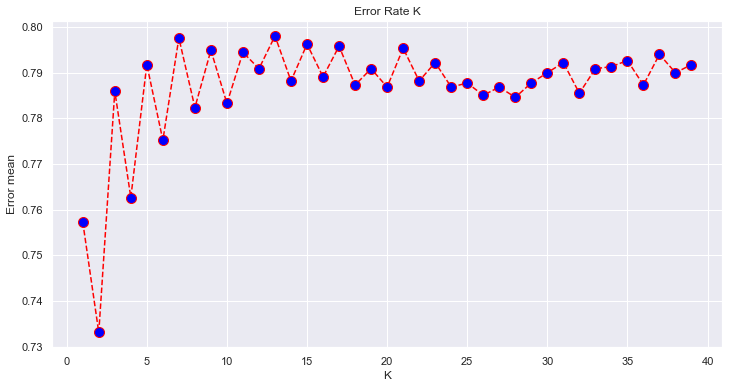

In [100]:

plt.figure(figsize=(12, 6))  
plt.plot(k_range, error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [101]:
from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier(n_neighbors = 7)
kNN.fit(X_train,y_train)

y_pred6=kNN.predict(X_test)

print(accuracy_score(y_test,y_pred6))
matrix5=confusion_matrix(y_test,y_pred6)
print(matrix5)

0.7975817286162113
[[995 186]
 [266 786]]


## Akurasi Skor Beberapa Algoritma Machine Learning Klasifikasi

In [102]:

print("Logistic Regression:", accuracy_score(y_test,y_pred1))
print("Decision Tree:", accuracy_score(y_test,y_pred2))
print("Random Forest:", accuracy_score(y_test,y_pred3))
print("SVM:", accuracy_score(y_test,y_pred4))
print("Naive Bayes:", accuracy_score(y_test,y_pred5))
print("KNN:", accuracy_score(y_test,y_pred6))

Logistic Regression: 0.8016121809225257
Decision Tree: 0.780564263322884
Random Forest: 0.8580385132109271
SVM: 0.8298253470667264
Naive Bayes: 0.7577250335871025
KNN: 0.7975817286162113


## Fitur Penting yang diprediksi oleh Random Forest

In [103]:
labels = ['age', 'job', 'marital', 'education','default',
          'balance', 'housing', 'loan', 'contact', 'day', 'month',
          'duration','campaign','pdays','previous', 'poutcome']

for feature in zip(labels, rf.feature_importances_):
    print(feature)

('age', 0.0842674634646199)
('job', 0.03880380127416234)
('marital', 0.018915928823164726)
('education', 0.023032325255269312)
('default', 0.001423293434341058)
('balance', 0.0895309367852581)
('housing', 0.03201694986859112)
('loan', 0.011596858522553743)
('contact', 0.03891269593960904)
('day', 0.07308460194551138)
('month', 0.08416057601282521)
('duration', 0.3654733627400871)
('campaign', 0.0344945940181618)
('pdays', 0.0409887943414443)
('previous', 0.02410190099867938)
('poutcome', 0.0391959165757216)


## Kesimpulan 

Berdasarkan analisis statistik data bank campaign :

- Jumlah client sebesar 11162 orang, 5289 sudah berlangganan deposito dan 5873 belum berlangganan.
- Rata - rata usia client 41 tahun.
- Mayoritas profesi client adalah management.
- Client dengan rentang usia 33 - 46 tahun menjadi client terbanyak dalam berlangganan depostio.
- Client dengan profesi management dan sudah menikah menjadi client terbanyak dalam berlangganan deposito.
- Client dengan profesi blue-corral menjadi client paling banyak menolak berlangganan deposito.
- Aktivitas pemasaran tertinggi berada pada bulan may.
- Lama durasi panggilan berpengaruh terhadap hasil kampanye bank, semakin lama durasi panggilan tersebut semakin besar peluang client berlangganan deposito. 

Berdasarkan akurasi skor machine learning : 
- Algoritma Random Forest memiliki skor akurasi tertinggi yaitu 85%.
- Faktor - faktor variabel yang mempengaruhi keberhasilan kampanye pemasaran bank berdasarkan prediksi dari algoritma randomforest dengan 5 nilai teratas :

    - Duration menjadi faktor utama dengan nilai tertinggi
    - Balance
    - age
    - month
    - day